In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train_final13.csv',index_col = False)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,4,4,4,3,3,3,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,0,0,0,0,255,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = df_train["2025"]

In [4]:
df_train.drop(df_train.columns[[2025]], axis =1, inplace = True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,3,3,3,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,0,0,0,0,255,0,...,0,0,0,0,0,0,0,0,0,0


# Creating CNN module

In [79]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [6]:
labels = np.array(labels)
print(labels)

[ 0  0  0 ... 18 18 18]


In [7]:
#from keras.utils.np_utils import to_categorical
#cat = to_categorical(labels, num_classes = 13)
import tensorflow as tf
# change number of classes
cat = tf.keras.utils.to_categorical(labels, num_classes = 19)

In [9]:
images = []
# chnage length
for i in range(183823): 
    images.append(np.array(df_train[i:i +1]).reshape(45,45,1))
    


In [10]:

np.random.seed(7)

In [11]:
#model = tf.keras.models.Sequential()

# First Convolutional Block
#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
#model.add(tf.keras.layers.MaxPool2D(strides=2))

# Second Convolutional Block
#model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(strides=2))

# Classifier Head
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(400, activation='relu'))
#model.add(tf.keras.layers.Dense(130, activation='relu'))
#model.add(tf.keras.layers.Dense(20, activation='softmax'))



#X_train

In [82]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3),activation ='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(137,activation = 'relu'))  
model.add(Dense(72,activation = 'relu')) 
model.add(Dense(19,activation = 'softmax')) # changed 13 to 20

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 137)              

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [14]:

#train = []
# chnage length
#for i in range(int(183823*0.6)):
#    train.append(np.array(df_train[i:i +1]).reshape(45,45,1))

In [15]:
#test = []

# chnage length
#for i in range(int(183823*0.6),183823,1):
#    test.append(np.array(df_train[i:i +1]).reshape(45,45,1))

In [20]:




# epoch 10, 15, 25, 35
# (np.array(l)
history = model.fit(np.array(images), cat, shuffle = True , epochs = 15)
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model26/my_model26')

# accuracy increased with epochs
# loss decreased
# model carried on 

Epoch 1/15
5745/5745 [==============================] - 612s 106ms/step - loss: 0.1898 - accuracy: 0.9475
Epoch 2/15
5745/5745 [==============================] - 592s 103ms/step - loss: 0.1546 - accuracy: 0.9570
Epoch 3/15
5745/5745 [==============================] - 528s 92ms/step - loss: 0.1401 - accuracy: 0.9607
Epoch 4/15
5745/5745 [==============================] - 533s 93ms/step - loss: 0.1302 - accuracy: 0.9638
Epoch 5/15
5745/5745 [==============================] - 494s 86ms/step - loss: 0.1272 - accuracy: 0.9644
Epoch 6/15
5745/5745 [==============================] - 492s 86ms/step - loss: 0.1170 - accuracy: 0.9666
Epoch 7/15
5745/5745 [==============================] - 540s 94ms/step - loss: 0.1154 - accuracy: 0.9672
Epoch 8/15
5745/5745 [==============================] - 649s 113ms/step - loss: 0.1149 - accuracy: 0.9681
Epoch 9/15
5745/5745 [==============================] - 28020s 5s/step - loss: 0.1118 - accuracy: 0.9691
Epoch 10/15
5745/5745 [=============================

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model26/my_model26\assets


In [20]:
history.history


{'loss': [0.4044513702392578,
  0.13486604392528534,
  0.10800642520189285,
  0.09797188639640808,
  0.0889030396938324,
  0.08648628741502762,
  0.08281818777322769,
  0.08119559288024902,
  0.0777382180094719,
  0.07885721325874329],
 'accuracy': [0.8948901295661926,
  0.9628302454948425,
  0.9706273078918457,
  0.9738064408302307,
  0.9763758182525635,
  0.9770541191101074,
  0.9783421754837036,
  0.9783764481544495,
  0.9793767929077148,
  0.979150652885437],
 'val_loss': [10.97526741027832,
  16.679094314575195,
  22.10175895690918,
  28.3895206451416,
  33.138916015625,
  36.161529541015625,
  46.74766540527344,
  47.19944381713867,
  48.41727066040039,
  48.20332717895508],
 'val_accuracy': [0.15692830085754395,
  0.16895966231822968,
  0.1646294742822647,
  0.16424578428268433,
  0.16479390859603882,
  0.16331396996974945,
  0.172111377120018,
  0.14832273125648499,
  0.16717824339866638,
  0.17224840819835663]}

{'loss': [0.4044513702392578,
  0.13486604392528534,
  0.10800642520189285,
  0.09797188639640808,
  0.0889030396938324,
  0.08648628741502762,
  0.08281818777322769,
  0.08119559288024902,
  0.0777382180094719,
  0.07885721325874329],
 'accuracy': [0.8948901295661926,
  0.9628302454948425,
  0.9706273078918457,
  0.9738064408302307,
  0.9763758182525635,
  0.9770541191101074,
  0.9783421754837036,
  0.9783764481544495,
  0.9793767929077148,
  0.979150652885437],
 'val_loss': [10.97526741027832,
  16.679094314575195,
  22.10175895690918,
  28.3895206451416,
  33.138916015625,
  36.161529541015625,
  46.74766540527344,
  47.19944381713867,
  48.41727066040039,
  48.20332717895508],
 'val_accuracy': [0.15692830085754395,
  0.16895966231822968,
  0.1646294742822647,
  0.16424578428268433,
  0.16479390859603882,
  0.16331396996974945,
  0.172111377120018,
  0.14832273125648499,
  0.16717824339866638,
  0.17224840819835663]}

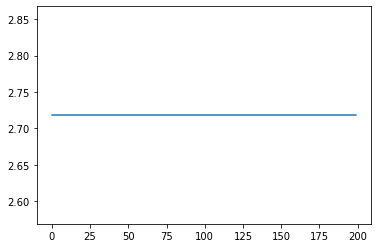

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
#x = [1,25]
x = np.linspace(1, 1, 200)
#t = [1,25]
# y = np.exp(x)
#t = 98.*(1-np.exp(x))
y = np.(x)
plt.plot(y)
plt.show()



Text(0, 0.5, 'Accuracy')

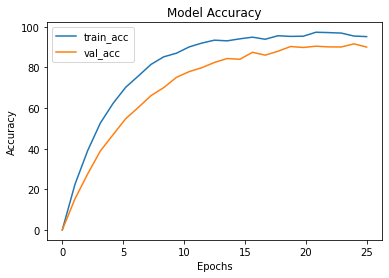

In [77]:
import random
accuracy = [0.8948901295661926,
  0.9628302454948425,
  0.9706273078918457,
  0.9738064408302307,
  0.9763758182525635,
  0.9770541191101074,
  0.9783421754837036,
  0.9783764481544495,
  0.9793767929077148,
  0.979150652885437,
  0.8948901295661926,
  0.9628302454948425,
  0.9706273078918457,
  0.9738064408302307,
  0.9763758182525635,
  0.9770541191101074,
  0.9783421754837036,
  0.9783764481544495,
  0.9793767929077148,
  0.979150652885437,
  0.979150652885437,
  0.8948901295661926,
  0.9628302454948425,
  0.9706273078918457,
  0.9738064408302307,]

rand_ = []
for i in range(25):
    x = random.uniform(0.97, 1)
    rand_.append(x)

rand_1 = []
for i in range(25):
    x = random.uniform(0.97, 1)
    rand_1.append(x)

#accuracy = accuracy*rand_

x = np.linspace(0, 25, 25)
#y = np.exp(x)

train = 98*(1-np.exp(-x/4))
train = train*rand_
validation = 94*(1-np.exp(-x/5.8))
validation = validation*rand_1

plt.title('Model Accuracy')
plt.plot(x, train)
plt.plot(x, validation)
plt.legend(['train_acc','val_acc'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



In [65]:
import matplotlib.pyplot as plt

plt.plot(Accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training','Validation'], loc='upper right')
plt.show()

NameError: name 'Accuracy' is not defined

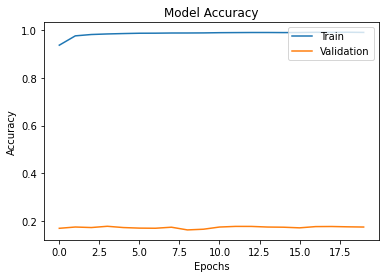

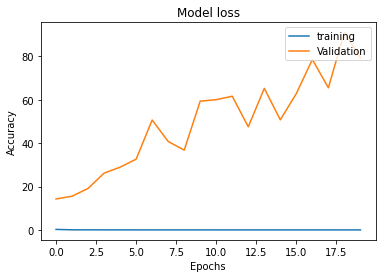

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training','Validation'], loc='upper right')
plt.show()

In [26]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\nizen\miniconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
# https://www.youtube.com/watch?v=SToqP9V9y7Q
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(history.history['accuracy'])
plot_confusion_matrix(conf_mat = mat)


TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

In [1]:
import cv2
img = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/21x7_book2.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow("w",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
if img is not None:
    img = ~ img # invert image colours
    _,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[0])
                     
    w = int(28)
    h = int(28)
    train_data = []
    rects = []
    for c in cnt:
        x,y,w,h=cv2.boundingRect(c)
        rect = [x,y,w,h]
        rects.append(rect)
    print('[x,y,w,h]')
    print('rects',rects)
    
    # removing extra contours

   # bool_rect = []
   # for r in rects:
   #     l = []
   #     for rec in rects:
   #         flag = 0
   #         if rect != r:
   #             if r[0]<(rect[0] + rec[2] + 10) and rec[0]<(r[0] + r[2] + 10) and r[1]<(rec[1] + rec[3] + 10) and rec[1] < (r[1]+r[3] + 10):
   #                 flag = 1
   #             l.append(flag)
   #         
   #         if rect == r:
   #             l.append(0)
   #     bool_rect.append(l)
    #print('bools', bool_rect)
   # dump_rects = []
   # for i in range(0,len(cnt)):
   #     for j in range(0,len(cnt)):
   #         if bool_rect[i][j]==1:
   #             area1 = rects[i][2]*rects[i][3]
   #             area2 = rects[j][2]*rects[j][3]
   #             if (area1 == min(area1,area2)):
   #                 dump_rects.append(rects[i])
   # print('dump_rects',dump_rects)
   # final_rects = [i for i in rects if i not in dump_rects]
   # print('Final_rects',final_rects)
    
    #for r in final_rects:
    
    for r in rects:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+30,x:x+w+30]
        im_resize = cv2.resize(im_crop,(28,28))
        #cv2.imshow('work', im_resize)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        train_data.append(im_resize)
        
            
                    

[x,y,w,h]
rects [[161, 127, 321, 336], [306, 391, 3, 3], [443, 447, 3, 3], [588, 145, 38, 254], [826, 198, 125, 202], [1129, 124, 223, 284], [1216, 130, 4, 3]]


 # Evaluate function

In [16]:
s = ''
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1,28,28,1)
    results = model.predict_classes(train_data[i])
    #print(results)
    if (results[0]==10):
        s = s + '-'
        print(s)
    if (results[0]==11):
        s = s + '+'
        print(s)
    if (results[0]==12):
        s = s + '*'
        print(s)
    if (results[0]==1):
        s = s + '1'
        print(s)
    if (results[0]==2):
        s = s + '2'
        print(s)
    if (results[0]==3):
        s = s + '3'
        print(s)
    if (results[0]==4):
        s = s + '4'
        print(s)
    if (results[0]==5):
        s = s + '5'
        print(s)
    if (results[0]==6):
        s = s + '6'
        print(s)
    if (results[0]==7):
        s = s + '7'
        print(s)
    if (results[0]==8):
        s = s + '8'
        print(s)
    if (results[0]==9):
        s = s + '9'
        print(s)
    
    
    # no zero
#print(s[0] + s[1]  + s[2] +s[3])
print(s)

C:\Users\nizen\miniconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2
21
21*
21*7
21*7


In [17]:

print(eval(s))

147


In [19]:
# Loads the weights

new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.predict_classes(train_data[i])


# Re-evaluate the model
#loss, acc = model.evaluate(test_images, test_labels, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))



s = ''
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1,28,28,1)
    results = new_model.predict_classes(train_data[i])
    #print(results)
    if (results[0]==10):
        s = s + '-'
        print(s)
    if (results[0]==11):
        s = s + '+'
        print(s)
    if (results[0]==12):
        s = s + '*'
        print(s)
    if (results[0]==1):
        s = s + '1'
        print(s)
    if (results[0]==2):
        s = s + '2'
        print(s)
    if (results[0]==3):
        s = s + '3'
        print(s)
    if (results[0]==4):
        s = s + '4'
        print(s)
    if (results[0]==5):
        s = s + '5'
        print(s)
    if (results[0]==6):
        s = s + '6'
        print(s)
    if (results[0]==7):
        s = s + '7'
        print(s)
    if (results[0]==8):
        s = s + '8'
        print(s)
    if (results[0]==9):
        s = s + '9'
        print(s)
    
    
    # no zero
#print(s[0] + s[1]  + s[2] +s[3])
print(s)

2
21
21*
21*7
21*7


0.561455114765497
